In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/kp/set-1000.csv')
df

,Generacion,Numero de Nodos,Numero de Terminales,Numero de Funciones,Iteraciones Promedio DoWhile,Terminal Agregar,Terminal Eliminar,Terminal Mejora,Profundidad,score_aceptabilidad
0,0,4,3,1,0,1,0,1,2,0
1,0,2,1,1,0,0,0,1,2,0
2,0,7,4,3,200,2,1,1,3,0
3,0,4,2,2,0,0,2,0,3,0
4,0,10,4,6,0,1,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...
999995,999,352,171,181,1400,83,49,7,20,1
999996,999,364,177,187,1400,86,54,7,20,1
999997,999,326,160,166,1800,70,50,7,20,1
999998,999,280,136,144,1000,68,34,8,20,1


In [3]:
df.describe()

,Generacion,Numero de Nodos,Numero de Terminales,Numero de Funciones,Iteraciones Promedio DoWhile,Terminal Agregar,Terminal Eliminar,Terminal Mejora,Profundidad,score_aceptabilidad
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499.500000,239.820085,118.560393,121.259692,948.69920,54.222191,25.247741,8.265181,18.051116,0.955076
std,288.675135,113.544920,57.082406,56.527066,330.62622,27.746791,16.131983,3.853659,3.256686,0.207137
min,0.000000,2.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,249.750000,143.000000,69.000000,74.000000,800.00000,28.000000,9.000000,6.000000,18.000000,1.000000
50%,499.500000,242.000000,119.000000,122.000000,1000.00000,55.000000,28.000000,7.000000,19.000000,1.000000
75%,749.250000,323.000000,159.000000,163.000000,1200.00000,74.000000,38.000000,10.000000,20.000000,1.000000
max,999.000000,712.000000,349.000000,363.000000,3200.00000,173.000000,92.000000,36.000000,20.000000,1.000000


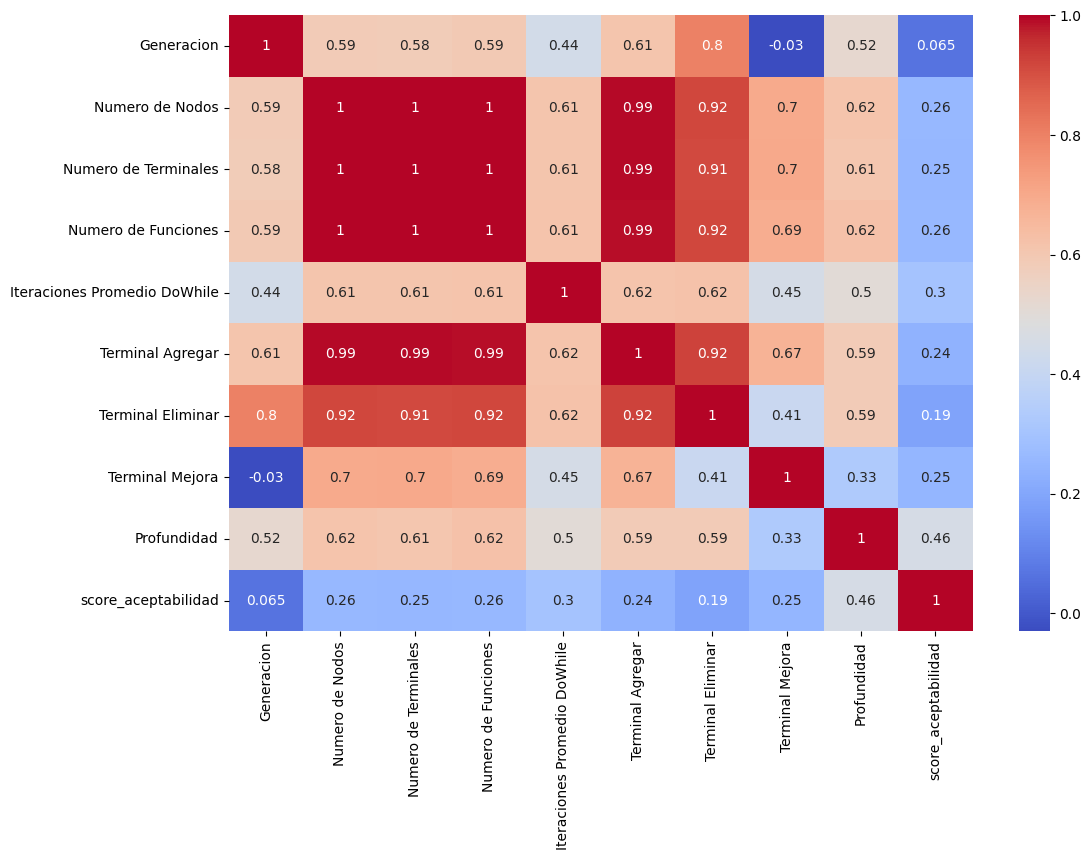

In [4]:
# Matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

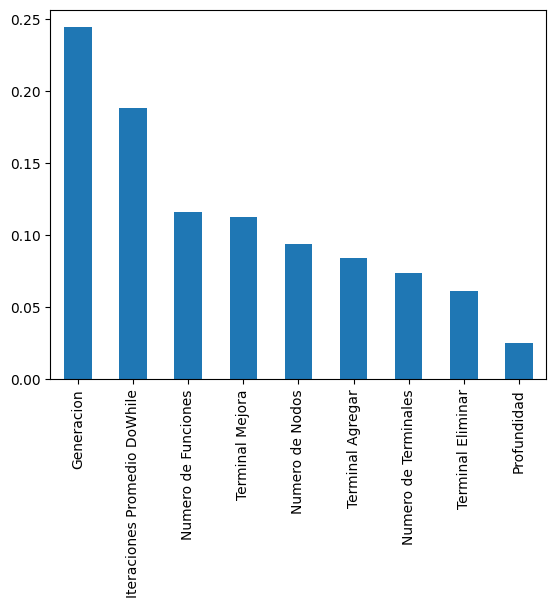

Index(['Generacion', 'Numero de Nodos', 'Numero de Funciones',
       'Iteraciones Promedio DoWhile', 'Terminal Mejora'],
      dtype='object')


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Separar características y la variable objetivo
X = df.drop('score_aceptabilidad', axis=1)
y = df['score_aceptabilidad']

# Modelo de Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Importancia de las características
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

# RFE
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Características seleccionadas por RFE
selected_features = X.columns[rfe.support_]
print(selected_features)

In [7]:
df_features = pd.DataFrame()
df_features['Generacion'] = df['Generacion']
df_features['Numero de Nodos'] = df['Numero de Nodos']
df_features['Iteraciones Promedio DoWhile'] = df['Iteraciones Promedio DoWhile']
df_features['Terminal Mejora'] = df['Terminal Mejora']
df_features['score_aceptabilidad'] = df['score_aceptabilidad']
df_features

,Generacion,Numero de Nodos,Iteraciones Promedio DoWhile,Terminal Mejora,score_aceptabilidad
0,0,4,0,1,0
1,0,2,0,1,0
2,0,7,200,1,0
3,0,4,0,0,0
4,0,10,0,0,0
...,...,...,...,...,...
999995,999,352,1400,7,1
999996,999,364,1400,7,1
999997,999,326,1800,7,1
999998,999,280,1000,8,1


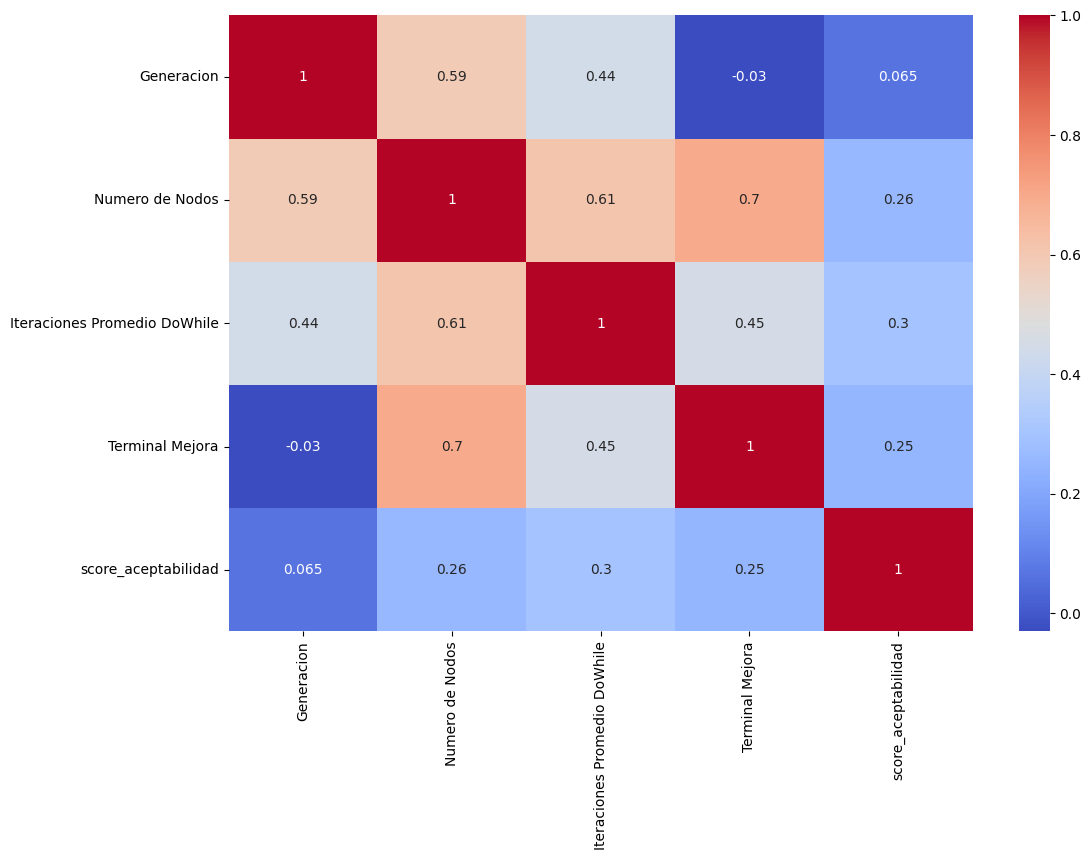

In [8]:
# Matriz de correlación
correlation_matrix = df_features.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()